In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("HousingData_Clean.csv", index_col=0) # Okurken
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [6]:
df.to_csv('Housing2.csv', index=False) # Oluştururken

In [7]:
X = df.drop(columns=["MEDV"])  #Girdi matrixi
y = df["MEDV"] # Çıktı vektörü

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print(f"MAE: {mae} MSE: {mse} R2: {r2}")

MAE: 2.7644505149644663 MSE: 20.011237519449367 R2: 0.7314399923001051


In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

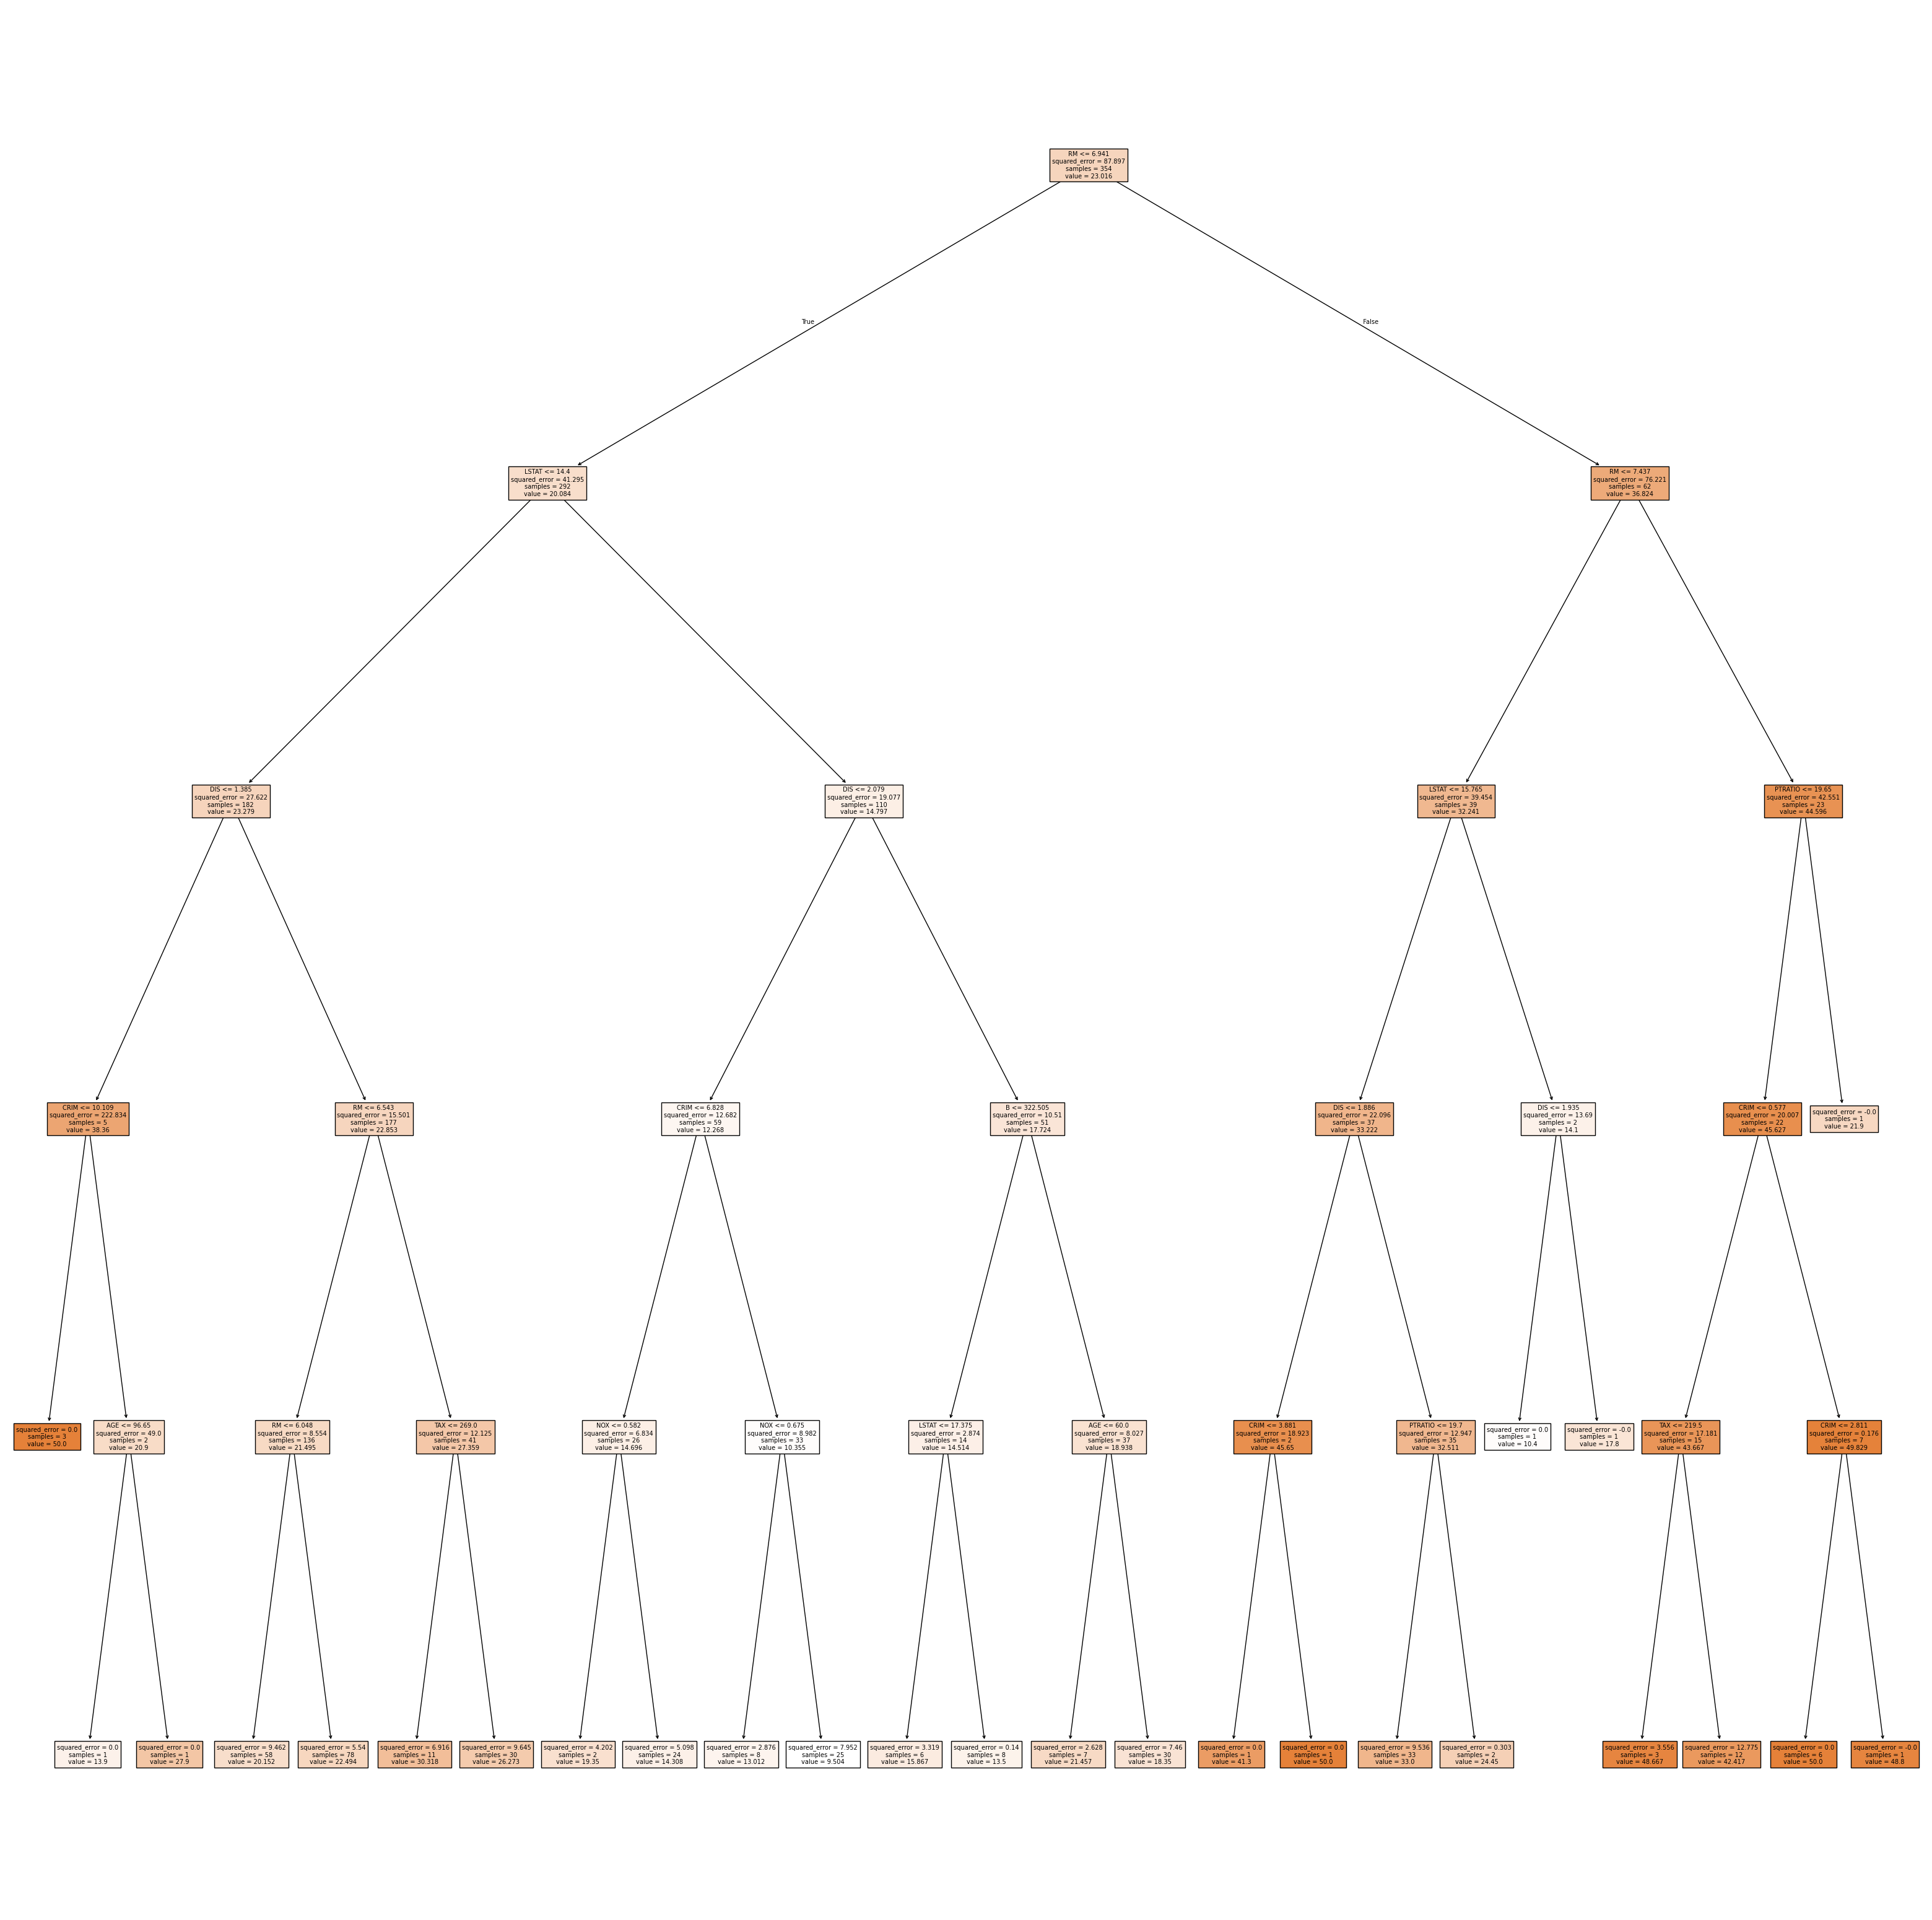

In [26]:
plt.figure(figsize=(40,40))
plot_tree(model, feature_names=X.columns,filled=True)
plt.show()

In [ ]:
!pip install seaborn

In [28]:
import seaborn as sb

<Axes: >

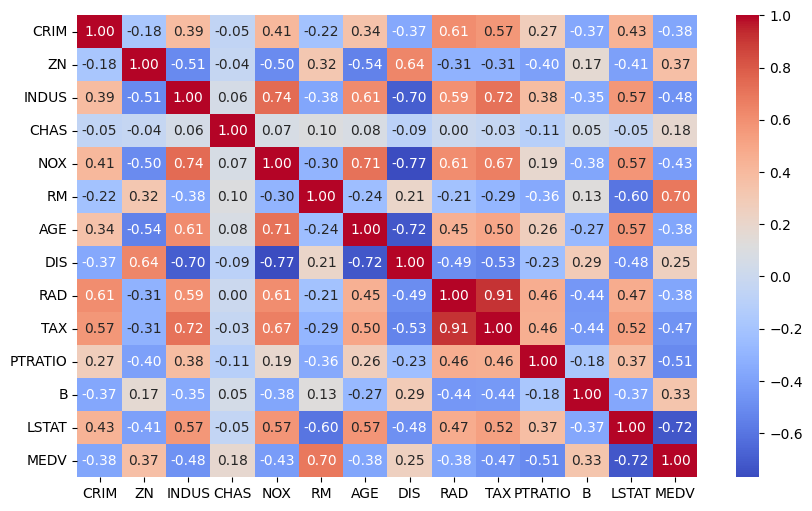

In [34]:
plt.figure(figsize=(10,6))
sb.heatmap(df.corr(), annot=True,cmap="coolwarm", fmt=".2f")

In [35]:
# 50-45-55-60-50 -> 
from sklearn.ensemble import RandomForestRegressor

In [36]:
model2 = RandomForestRegressor(n_estimators=5, max_depth=5, random_state=42)
model2.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=5, random_state=42)

In [37]:
y_pred2 = model2.predict(X_test)

In [38]:
mae2 = mean_absolute_error(y_test, y_pred2) 
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

mae2,mse2,r2_2

(2.5924493682503305, 13.520813296525835, 0.8185444693515519)

In [48]:
# XSearchCV -> GridSearchCV, RandomSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": list(range(5,15)),
    "max_depth": list(range(1,10))
}

grid = GridSearchCV(  RandomForestRegressor(), param_grid, scoring="r2", cv=10 )
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
             scoring='r2')

In [49]:
grid.best_estimator_, grid.best_score_, grid.best_params_

(RandomForestRegressor(max_depth=8, n_estimators=12),
 np.float64(0.7924995890515848),
 {'max_depth': 8, 'n_estimators': 12})

In [ ]:
# Kaggle ya da herhangi bir noktadan denetimli regression için uygun bir veri seti bulup şu ana kadar öğrendiğimiz 3 algoritmayla bir makine öğrenmesi modeli geliştirmek.